Test du projet de class trajets indirect

In [1]:
%load_ext autoreload
%autoreload 2
import sys #c'est pas propre mais pour le moment pour importer mes modules perso dans le notebook je ne sais pas faire
sys.path.append(r'C:\Users\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import traitement_od as t
import pandas as pd
import numpy as np
import altair as alt
import datetime as dt
pd.set_option('display.max_colwidth', 1000)
import os
from sklearn.cluster import DBSCAN

IMPORT DONNEES GLOBALES

In [2]:
%time df_3semaines=t.ouvrir_fichier_lapi('2019-01-28 00:00:00','2019-02-17 23:59:59').set_index('created').sort_index()

Wall time: 1min 10s


IMPORT DES DONNEES SUR UNE JOURNEE

In [350]:
df_journee=t.ouvrir_fichier_lapi('2019-01-28','2019-01-30')

In [352]:
#redresser la valeur de l
df_journee.loc[df_journee['camera_id']==15,'l']=1

LISTE DES TRAJETS

In [3]:
liste_trajet_locale=(pd.DataFrame([{'origine':'A63','destination':'A10','cam_o':15, 'cam_d':11, 'trajets':[
                                                        {'cameras':[15,19,4,5,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,19,1,5,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,4,5,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,1,5,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,19,5,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,19,4,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,19,1,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,4,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,1,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,5,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,19,11],'type_trajet':'indirect'},
                                                        {'cameras':[15,11],'type_trajet':'direct'}
                                                       ]},
                            {'origine':'A10','destination':'A63','cam_o':12, 'cam_d':13,'trajets':[{'cameras':[12,6,2,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,6,3,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,6,2,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,6,3,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,6,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,2,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,3,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,2,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,3,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,6,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[12,13],'type_trajet':'direct'},
                                                       ]},
                            {'origine':'A63','destination':'N10','cam_o':15, 'cam_d':5,'trajets':[{'cameras':[15,19,4,5],'type_trajet':'indirect'},
                                                        {'cameras':[15,19,1,5],'type_trajet':'indirect'},
                                                        {'cameras':[15,4,5],'type_trajet':'indirect'},
                                                        {'cameras':[15,1,5],'type_trajet':'indirect'},
                                                        {'cameras':[15,19,5],'type_trajet':'indirect'}, 
                                                        {'cameras':[15,5],'type_trajet':'direct'},
                                                       ]},
                            {'origine':'N10','destination':'A63','cam_o':6, 'cam_d':13,'trajets':[{'cameras':[6,2,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[6,3,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[6,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[6,2,13],'type_trajet':'indirect'},
                                                        {'cameras':[6,3,13],'type_trajet':'indirect'},
                                                        {'cameras':[6,13],'type_trajet':'direct'},
                                                       ]},
                            {'origine':'A62','destination':'A10','cam_o':10, 'cam_d':11,'trajets':[{'cameras':[10,4,5,11],'type_trajet':'indirect'},
                                                        {'cameras':[10,4,11],'type_trajet':'indirect'},
                                                        {'cameras':[10,5,11],'type_trajet':'indirect'},
                                                        {'cameras':[10,11],'type_trajet':'direct'}
                                                       ]},
                            {'origine':'A10','destination':'A62','cam_o':12, 'cam_d':9,'trajets':[{'cameras':[12,6,3,9],'type_trajet':'indirect'},
                                                        {'cameras':[12,3,9],'type_trajet':'indirect'},
                                                        {'cameras':[12,6,9],'type_trajet':'indirect'},
                                                        {'cameras':[12,9],'type_trajet':'direct'}
                                                       ]},
                            {'origine':'A62','destination':'N10','cam_o':10, 'cam_d':5,'trajets':[{'cameras':[10,4,5],'type_trajet':'indirect'},
                                                        {'cameras':[10,5],'type_trajet':'direct'},
                                                       ]},
                            {'origine':'N10','destination':'A62','cam_o':6, 'cam_d':9,'trajets':[{'cameras':[6,3,9],'type_trajet':'indirect'},
                                                        {'cameras':[6,9],'type_trajet':'direct'},
                                                       ]},
                            {'origine':'A63','destination':'A62','cam_o':15, 'cam_d':9,'trajets':[{'cameras':[15,19,9],'type_trajet':'indirect'},
                                                        {'cameras':[15,9],'type_trajet':'direct'},
                                                       ]},
                            {'origine':'A62','destination':'A63','cam_o':10, 'cam_d':13,'trajets':[{'cameras':[10,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[10,13],'type_trajet':'direct'},
                                                       ]},
                            {'origine':'A89','destination':'A63','cam_o':8 ,'cam_d':13,'trajets':[{'cameras':[8,3,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[8,18,13],'type_trajet':'indirect'},
                                                        {'cameras':[8,3,13],'type_trajet':'indirect'},
                                                        {'cameras':[8,13],'type_trajet':'direct'},
                                                       ]},
                            {'origine':'A63','destination':'A89','cam_o':15, 'cam_d':7,'trajets':[{'cameras':[15,19,4,7],'type_trajet':'indirect'},
                                                        {'cameras':[15,4,7],'type_trajet':'indirect'},
                                                        {'cameras':[15,19,7],'type_trajet':'indirect'},
                                                        {'cameras':[15,7],'type_trajet':'direct'},
                                                       ]},
                            {'origine':'A89','destination':'A62','cam_o':8, 'cam_d':9,'trajets':[{'cameras':[8,3,9],'type_trajet':'indirect'},
                                                        {'cameras':[8,9],'type_trajet':'direct'}
                                                       ]},
                            {'origine':'A62','destination':'A89','cam_o':10, 'cam_d':7,'trajets':[{'cameras':[10,4,7],'type_trajet':'indirect'},
                                                        {'cameras':[10,7],'type_trajet':'direct'}
                                                       ]},
                            {'origine':'A89','destination':'A10','cam_o':8, 'cam_d':11,'trajets':[{'cameras':[8,5,11],'type_trajet':'indirect'},
                                                        {'cameras':[8,11],'type_trajet':'direct'}
                                                       ]},
                            {'origine':'A10','destination':'A89','cam_o':12, 'cam_d':7,'trajets':[{'cameras':[12,6,7],'type_trajet':'indirect'},
                                                        {'cameras':[12,7],'type_trajet':'direct'}
                                                       ]},
                            {'origine':'A89','destination':'N10','cam_o':8, 'cam_d':5,'trajets':[{'cameras':[8,5],'type_trajet':'direct'}
                                                       ]},
                            {'origine':'N10','destination':'A89','cam_o':6, 'cam_d':7,'trajets':[{'cameras':[6,7],'type_trajet':'direct'}
                                                       ]},
                            {'origine':'A10','destination':'A660','cam_o':12, 'cam_d':18,'trajets':[{'cameras':[12,6,2,18],'type_trajet':'indirect'},
                                                         {'cameras':[12,6,3,18],'type_trajet':'indirect'},
                                                         {'cameras':[12,2,18],'type_trajet':'indirect'},
                                                         {'cameras':[12,3,18],'type_trajet':'indirect'},
                                                         {'cameras':[12,6,18],'type_trajet':'indirect'},
                                                         {'cameras':[12,18],'type_trajet':'direct'},
                                                        ]},
                            {'origine':'A660','destination':'A10','cam_o':19, 'cam_d':18,'trajets':[{'cameras':[19,4,5,11],'type_trajet':'indirect'},
                                                         {'cameras':[19,1,5,11],'type_trajet':'indirect'},
                                                         {'cameras':[19,1,11],'type_trajet':'indirect'},
                                                         {'cameras':[19,4,11],'type_trajet':'indirect'},
                                                         {'cameras':[19,5,11],'type_trajet':'indirect'},
                                                         {'cameras':[19,11],'type_trajet':'direct'},
                                                       ]},
                            {'origine':'A660','destination':'A62','cam_o':19, 'cam_d':9,'trajets':[{'cameras':[19,9],'type_trajet':'direct'}
                                                        ]},
                            {'origine':'A62','destination':'A660','cam_o':10, 'cam_d':18,'trajets':[{'cameras':[10,18],'type_trajet':'direct'}
                                                        ]},
                            {'origine':'A660','destination':'A89','cam_o':19, 'cam_d':7,'trajets':[{'cameras':[19,4,7],'type_trajet':'indirect'},
                                                         {'cameras':[19,7],'type_trajet':'direct'}
                                                        ]},
                            {'origine':'A89','destination':'A660','cam_o':8, 'cam_d':18,'trajets':[{'cameras':[8,3,18],'type_trajet':'indirect'},
                                                         {'cameras':[8,18],'type_trajet':'direct'}
                                                        ]},
                            {'origine':'N10','destination':'A660','cam_o':6, 'cam_d':18,'trajets':[{'cameras':[6,2,18],'type_trajet':'indirect'},
                                                         {'cameras':[6,3,18],'type_trajet':'indirect'},
                                                         {'cameras':[6,18],'type_trajet':'direct'},
                                                        ]},
                            {'origine':'A660','destination':'N10','cam_o':19, 'cam_d':5,'trajets':[{'cameras':[19,1,5],'type_trajet':'indirect'},
                                                         {'cameras':[19,4,5],'type_trajet':'indirect'},
                                                         {'cameras':[19,5],'type_trajet':'direct'},
                                                        ]}
                           ]))[['origine', 'destination', 'cam_o', 'cam_d','trajets']]

In [730]:
%time test=t.trajet(df_journee, '2019-01-29 08:00:00', 60, 16, [6,13], type='Global')

Wall time: 6.33 s


CALCUL DES O-D SUR UNE JOURNEE, AVEC RENVOI DES DF O-D OU PASSAGES DANS UN DICO PAR O-D OU UNE DF GLOBALE

In [353]:
dico_trajet_od, dico_passag_od, dico_od,  dico_passag=t.transit_1_jour(df_journee,'2019-01-28 08:00:00', liste_trajet_locale)

date : 2019-01-28 08:00:00 debut_traitement : 2019-04-05 15:32:42.058239
date : 2019-01-28 09:00:00 debut_traitement : 2019-04-05 15:35:25.209336


IMPORTANT : VERIF DES DOUBLONS ENTRE LES TRAJETS

In [10]:
A660N10=dico_passag_od['A660-N10'].set_index(['created','immat'])
A63N10=dico_passag_od['A63-N10'].set_index(['created','immat'])
A63N10.loc[A63N10.index.isin(A660N10.index)].reset_index().set_index('created')

,immat,camera_id,fiability,l,state
created,,,,,


CREER LE TABLEAU DE MATRICE O-D

In [9]:
#MATRICE O-D !!II!
pd.pivot_table(dico_od,values='l', index='origine', columns='destination',aggfunc='count', margins=True )

destination,A10,A62,A63,A660,A89,N10,All
origine,,,,,,,
A10,NaN,5603.0,1689.0,2121.0,223.0,NaN,9636
A62,1024.0,NaN,226.0,560.0,346.0,1589.0,3745
A63,1314.0,126.0,NaN,NaN,653.0,13322.0,15415
A660,NaN,827.0,NaN,NaN,1540.0,7920.0,10287
A89,292.0,853.0,1156.0,1525.0,NaN,896.0,4722
N10,NaN,3285.0,15664.0,5372.0,595.0,NaN,24916
All,2630.0,10694.0,18735.0,9578.0,3357.0,23727.0,68721


POURCENTAGE PL PAR PLAGE HORAIRE ET CAMERA

In [432]:
#isoler pl source
groupe_tv_type_simple=df_journee.groupby('immat')['l'].apply(lambda x:test_unicite_type(list(x),mode='1/2')).reset_index().drop_duplicates('immat')
df_pl=df_journee.join(groupe_tv_type_simple.loc[groupe_tv_type_simple['l']==1].set_index('immat'),on='immat',how='inner',rsuffix='_right')
df_pl.set_index('created',inplace=True)

#obtenir les nb de pl par heure et par camera sur la source
df_synthese_pl_tot=df_pl.groupby('camera_id').resample('H').count()['immat'].rename(column={'immat':'nb_pl_tot'})
df_synthese_pl_transit=dico_passag.set_index('created').groupby('camera_id').resample('H').count()['immat'].rename(column={'immat':'nb_pl_transit'})
df_pct_pl_transit=pd.concat([df_synthese_pl_tot,df_synthese_pl_transit], axis=1, join='inner')
df_pct_pl_transit.columns=[['nb_pl_tot','nb_pl_transit']]
df_pct_pl_transit['pct_pl_transit']=df_pct_pl_transit.apply(lambda x : float(x['nb_pl_transit'])*100 / x['nb_pl_tot'] ,axis=1)
df_pct_pl_transit

TESTS DONNEES COMPLETES

In [7]:
dico_trajet_od, dico_passag_od, dico_od,  dico_passag=t.transit_temps_complet_v2('2019-01-28 00:00:00',21,liste_trajet_locale,df_3semaines)

date : 2019-01-28 00:00:00 debut_traitement : 2019-04-05 17:14:07.432442
date : 2019-01-28 01:00:00 debut_traitement : 2019-04-05 17:14:07.963569
date : 2019-01-28 02:00:00 debut_traitement : 2019-04-05 17:14:08.713393
date : 2019-01-28 03:00:00 debut_traitement : 2019-04-05 17:14:09.307003
date : 2019-01-28 04:00:00 debut_traitement : 2019-04-05 17:14:09.838130
date : 2019-01-28 05:00:00 debut_traitement : 2019-04-05 17:14:10.213042
date : 2019-01-28 06:00:00 debut_traitement : 2019-04-05 17:14:10.603577
date : 2019-01-28 07:00:00 debut_traitement : 2019-04-05 17:14:10.978487
date : 2019-01-28 08:00:00 debut_traitement : 2019-04-05 17:14:11.353398
date : 2019-01-28 09:00:00 debut_traitement : 2019-04-05 17:14:11.743935
date : 2019-01-28 10:00:00 debut_traitement : 2019-04-05 17:14:12.118848
date : 2019-01-28 11:00:00 debut_traitement : 2019-04-05 17:14:12.509377
date : 2019-01-28 12:00:00 debut_traitement : 2019-04-05 17:14:12.899915
date : 2019-01-28 13:00:00 debut_traitement : 2019-

In [37]:
#verifs
dico_passag_od['A660-N10'].set_index('created').loc['2019-01-31 08:00:00':].sort_index().head(5) #visualiser les passages

,camera_id,immat,fiability,l,state
created,,,,,
2019-01-31 08:00:30,19,9dd7529a19c83bed931c0d4b40840b7a36328e20,99,1,ES
2019-01-31 08:01:56,19,574c4311fa597da55a2aac80e1097129dd7419e1,99,-1,FR
2019-01-31 08:02:15,19,c57c4941aadcb97905b3ef0e410578f22f516efa,99,-1,ES
2019-01-31 08:02:38,19,8ddc4c2f1189ae0a4224f688200b211c3fd0f675,99,1,ES
2019-01-31 08:02:49,19,d735cccf1331cd23ba652c145358f46405bbc306,99,0,ES


In [40]:
df_3semaines.loc[df_3semaines['immat']=='8ddc4c2f1189ae0a4224f688200b211c3fd0f675']#retrouver cette immatriculatiob dans les données completes

,camera_id,immat,fiability,l,state
created,,,,,
2019-01-30 21:51:20,15,8ddc4c2f1189ae0a4224f688200b211c3fd0f675,99,-1,ES
2019-01-31 08:02:38,19,8ddc4c2f1189ae0a4224f688200b211c3fd0f675,99,1,ES
2019-01-31 08:48:31,5,8ddc4c2f1189ae0a4224f688200b211c3fd0f675,99,1,ES
2019-02-06 08:23:12,8,8ddc4c2f1189ae0a4224f688200b211c3fd0f675,99,1,ES
2019-02-06 08:48:45,3,8ddc4c2f1189ae0a4224f688200b211c3fd0f675,99,1,ES
2019-02-06 09:18:21,18,8ddc4c2f1189ae0a4224f688200b211c3fd0f675,99,0,ES
2019-02-06 11:37:39,13,8ddc4c2f1189ae0a4224f688200b211c3fd0f675,99,-1,ES


In [265]:
#verif sur un trajet a unhoraire donnee
%time test=t.trajet(df_3semaines.loc['2019-01-29 08:00:00':'2019-01-30 15:00:00'], '2019-01-29 08:00:00', 60, 16, [15,5], type='Global')

Wall time: 9.62 s


In [127]:
%time test=t.trajet(df_3semaines.loc['2019-01-29 21:00:00':'2019-01-30 15:00:00'], '2019-01-29 21:00:00', 60, 16, [19,4])

PasDePlError: pas de PL sur la période et les cameras visées

In [135]:
#pour test des fonctions de trajets directs
df_duree=df_3semaines.loc['2019-01-29 21:00:00':'2019-01-30 15:00:00'].loc['2019-01-29 21:00:00':'2019-01-29 22:00:00']
df_duree_cam1=df_duree.loc[df_duree.loc[:,'camera_id']==19]
df_duree_autres_cam=df_3semaines.loc['2019-01-29 21:00:00':'2019-01-30 15:00:00'].loc[(df_3semaines.loc['2019-01-29 21:00:00':'2019-01-30 15:00:00'].loc[:,'immat'].isin(df_duree_cam1.loc[:,'immat']))]
cam1_croise_autre_cam=df_duree_cam1.reset_index().merge(df_duree_autres_cam.reset_index(), on='immat')
cam1_croise_suivant=cam1_croise_autre_cam.loc[(cam1_croise_autre_cam.loc[:,'created_x']<cam1_croise_autre_cam.loc[:,'created_y'])]
cam1_fastest_next=cam1_croise_suivant.loc[cam1_croise_suivant.groupby(['immat'])['created_y'].idxmin()]

In [317]:
#pour test des fonctions de trajets global 
liste_trajet_od=[(15,19,4,5),(15,5),(15,4,5),(15,19,5)]
camera1, camera2=15, 5
df=df_3semaines.loc['2019-01-29 00:00:00':'2019-01-30 23:59:59']
df_duree=df.loc['2019-01-29 08:00:00':'2019-01-29 09:00:00']
df_duree_cam1=df_duree.loc[df_duree.loc[:,'camera_id']==camera1]
df_duree_autres_cam=df.loc[(df.loc[:,'immat'].isin(df_duree_cam1.loc[:,'immat']))]
df_autres_cam_temp_ok=df_duree_autres_cam.loc['2019-01-29 08:00:00':'2019-01-30 08:00:00']
groupe=(df_autres_cam_temp_ok.sort_index().reset_index().groupby('immat').agg({'camera_id':lambda x : tuple(x), 'l': lambda x : test_unicite_type(list(x),'1/2'),
                                                                        'created':lambda x: tuple(x)}))
groupe['camera_id']=groupe.apply(lambda x : filtrer_passage(x['camera_id'],liste_trajet_od),axis=1)
groupe['created']=groupe.apply(lambda x : recuperer_date_cam2(x['camera_id'],x['created'],liste_trajet_od),axis=1)

In [318]:
df_agrege=df_duree_cam1.join(groupe,on='immat',lsuffix='_left')[['immat', 'l','camera_id','created']].rename(columns={'created':'date_cam_2', 'camera_id':'cameras'})
df_agrege=df_agrege.reset_index().rename(columns={'created':'date_cam_1'})
df_agrege['tps_parcours']=df_agrege.apply(lambda x : x.date_cam_2-x.date_cam_1, axis=1)

In [319]:
df_trajet=df_agrege.loc[df_agrege['cameras'].isin(liste_trajet_od)]
df_trajet_final=(df_trajet.loc[(df_trajet['cameras'].apply(lambda x : x[-1])==camera2) & (df_trajet['l']==1)
                                  & (df_trajet['tps_parcours'] < pd.Timedelta('11:30:00'))])

In [323]:
df_trajet.rename(columns={'date_cam_1':'created'})[['created','immat','tps_parcours']]

,created,immat,tps_parcours
0,2019-01-29 08:00:16,297caaae436d3f8ddf233000476038e3e4b68e94,01:56:30
2,2019-01-29 08:00:23,a80e71eb1efa9b3928784d0f9a2b858720700a52,01:35:58
3,2019-01-29 08:00:24,4b6193e6bde15a1f9147ac769d2e45f92835661c,01:01:00
4,2019-01-29 08:00:30,5210591e72fe4a358acafd085381804cb7567629,01:01:57
6,2019-01-29 08:00:47,1637419e7fd81a5c6d808302c01397c2cd20cf28,02:03:07
8,2019-01-29 08:00:51,ce422cff5fe535c7e7a5623392ffe525145431cc,01:36:44
10,2019-01-29 08:01:00,44467e0fb9e7181fdca6f3307711db15fe13d932,01:02:13
11,2019-01-29 08:01:03,39d4b89c6a7226a399eafe43b09cc100584f1c1f,01:02:41
13,2019-01-29 08:01:24,6df7ab1df1bf36ece259a7652a8e7aa8d9505ada,01:01:18
14,2019-01-29 08:01:34,0f5e26bd672f13c8c0c974f4adadf83f3658e886,01:00:52


,camera_id,immat,fiability,l,state
created,,,,,
2019-01-29 08:00:16,15,297caaae436d3f8ddf233000476038e3e4b68e94,99,-1,RO
2019-01-29 08:00:19,15,f3ae05e6d6f0605a9dc9fc3f2ff9a001d5cfaf61,99,-1,FR
2019-01-29 08:00:23,15,a80e71eb1efa9b3928784d0f9a2b858720700a52,99,-1,ES
2019-01-29 08:00:24,15,4b6193e6bde15a1f9147ac769d2e45f92835661c,100,-1,ES
2019-01-29 08:00:30,15,5210591e72fe4a358acafd085381804cb7567629,99,-1,PT
2019-01-29 08:00:42,15,17b1c89c7cec20deadc89e51bb7ab64ebb097aa9,99,-1,FR
2019-01-29 08:00:47,15,1637419e7fd81a5c6d808302c01397c2cd20cf28,99,-1,FR
2019-01-29 08:00:47,15,de8c2faf3ff92ef10bfbfac11738899cf3729aee,99,-1,!!
2019-01-29 08:00:49,19,de8c2faf3ff92ef10bfbfac11738899cf3729aee,41,1,!!


In [ ]:
groupe

In [217]:
passages=df_duree_autres_cam.reset_index().sort_values(['immat','created'])

In [218]:
passages.loc[passages['immat']=='de8c2faf3ff92ef10bfbfac11738899cf3729aee']

,created,camera_id,immat,fiability,l,state
3,2019-01-29 01:16:08,10,de8c2faf3ff92ef10bfbfac11738899cf3729aee,99,0,!!
4,2019-01-29 01:33:48,8,de8c2faf3ff92ef10bfbfac11738899cf3729aee,69,0,!!
5,2019-01-29 01:35:40,6,de8c2faf3ff92ef10bfbfac11738899cf3729aee,99,0,!!
7,2019-01-29 02:06:28,18,de8c2faf3ff92ef10bfbfac11738899cf3729aee,99,0,!!
9,2019-01-29 02:31:32,4,de8c2faf3ff92ef10bfbfac11738899cf3729aee,89,0,!!
10,2019-01-29 02:34:35,10,de8c2faf3ff92ef10bfbfac11738899cf3729aee,99,0,!!
11,2019-01-29 02:42:21,5,de8c2faf3ff92ef10bfbfac11738899cf3729aee,99,0,!!
12,2019-01-29 02:51:50,13,de8c2faf3ff92ef10bfbfac11738899cf3729aee,99,-1,!!
13,2019-01-29 03:00:05,5,de8c2faf3ff92ef10bfbfac11738899cf3729aee,99,0,!!
16,2019-01-29 03:06:49,4,de8c2faf3ff92ef10bfbfac11738899cf3729aee,59,0,!!


In [269]:
def test_unicite_type(liste_l, mode='unique'):
        """test pour voir si un vehicule a ete toujours vu de la mme façon ou non
           en entre : liste de valeur de l iisues d'une df""" 
        if mode=='unique' : 
            if len(set(liste_l))==1 :
                return liste_l[0]
            else : 
                return -1
        elif mode=='1/2' :
            if any(liste_l)==1 : 
                return 1
            else : 
                return -1

In [312]:
liste=(15, 19, 4, 5, 11)
filtre=[(15,19,4,5),(15,5),(15,4,5),(15,19,5)]
liste_created=('2019-01-29 08:31:32', '2019-01-29 09:01:42', '2019-01-29 09:21:22', '2019-01-29 09:37:24', '2019-01-29 14:14:20', '2019-01-29 14:31:10', '2019-01-29 14:53:43', '2019-01-29 14:53:44', '2019-01-29 15:40:26', '2019-01-30 14:01:59', '2019-01-30 15:25:17', '2019-01-30 15:54:52', '2019-01-30 16:09:09')
for elem in filtre : 
    if liste[:len(elem)]==tuple(elem) : 
        print(liste[:len(elem)])
        break

(15, 19, 4, 5)


In [190]:
tuple(filtre)

(15, 19, 4, 7)

In [315]:
def filtrer_passage(liste, liste_trajet) :
    for filtre in liste_trajet :
        if liste[:len(filtre)]==tuple(filtre):
            return liste[:len(filtre)]
    else : return liste

In [316]:
def recuperer_date_cam2(liste,liste_created,liste_trajet):
    for filtre in liste_trajet :
        if liste[:len(filtre)]==tuple(filtre):
            return liste_created[len(filtre)-1]
    else : return liste_created[-1]

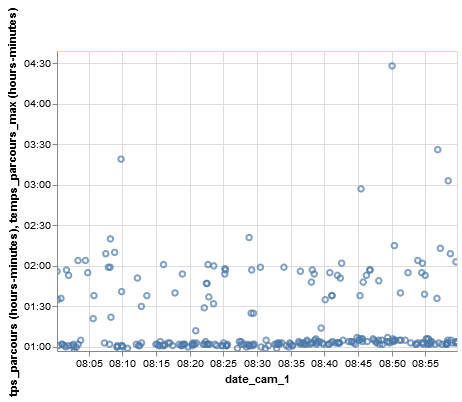

In [298]:
test.graph()